# Project1: Image Classification:MNIST Dataset

In [ ]:
import torch
from torch import nn
from torch import optim

from torchinfo import summary

import torchvision
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm 
import pandas as pd

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Dataset

### 1.1 Downloading Data and creating Train, Dev and Test splits

In [ ]:
#Train_set=datasets.MNIST('./MNIST',train = True,transform=transforms.ToTensor(),download=True)
Train=datasets.MNIST('./MNIST',train = True,transform=transforms.ToTensor(),download=False)
Test_set=datasets.MNIST('./MNIST',train = False,transform=transforms.ToTensor(),download=False)

In [ ]:
print("Trainset +validation:",len(Train))
print("Trainset:",len(Test_set))

Trainset +validation: 60000
Trainset: 10000


#### Dev split

In [ ]:
Train_set, Dev_set = torch.utils.data.random_split(Train, [50000,10000])
print("Train set:",len(Train_set))
print("Test set:",len(Test_set))
print("Dev set:",len(Dev_set))

Train set: 50000
Test set: 10000
Dev set: 10000


### 1. 2 Exploring Data

#### 1.2.1 Classes Distribution

In [ ]:
#Train 
Train_dict={}
for i in range (len(Train_set)):
    Train_dict[i]=Train_set[i][1]
    
Train_lbls=pd.DataFrame(pd.Series(Train_dict))
Train_lbls.value_counts().sort_values()

5    4517
6    4857
4    4893
8    4894
0    4937
2    4952
9    4969
3    5089
7    5263
1    5629
dtype: int64

In [ ]:
Dev_dict={}
for i in range (len(Dev_set)):
    Dev_dict[i]=Dev_set[i][1]
    
Dev_lbls=pd.DataFrame(pd.Series(Dev_dict))
Dev_lbls.value_counts().sort_values()

5     904
4     949
8     957
9     980
0     986
7    1002
2    1006
3    1042
6    1061
1    1113
dtype: int64

In [ ]:
Test_dict={}
for i in range (len(Test_set)):
    Test_dict[i]=Test_set[i][1]
    
Test_lbls=pd.DataFrame(pd.Series(Test_dict))
Test_lbls.value_counts().sort_values()

5     892
6     958
8     974
0     980
4     982
9    1009
3    1010
7    1028
2    1032
1    1135
dtype: int64

#### 1.2.2 Plotting Samples

In [ ]:
#The Sample consists of a tuple (image_tensor, label)
Train_set[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
img,lbl=Train_set[0]

print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype} \n")
print(f"Image label: {lbl} : {lbl}")
print(f"Label datatype: {type(lbl)}")

Image shape: torch.Size([1, 28, 28])
Image datatype: torch.float32 

Image label: 9 : 9
Label datatype: <class 'int'>


<Figure size 1000x600 with 0 Axes>

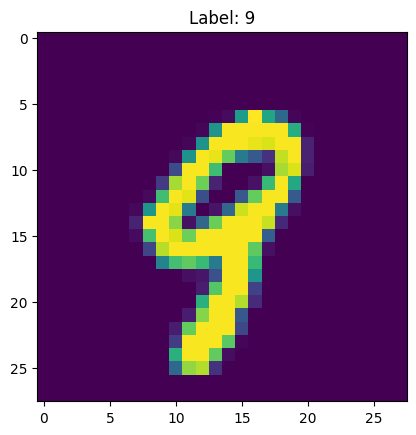

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.imshow(img.permute(1,2,0)) # as image dim[1,28,28] to plot [H,W,C]

plt.title(f"Label: {lbl}")
#plt.title(f"{label1}: {idx_to_class[label1]}")
plt.figure(figsize= (10,6))

[10238, 27924, 22471, 39086, 46227, 27841, 46877, 666, 37167, 26820, 30962, 24590, 21954, 6330, 39949]


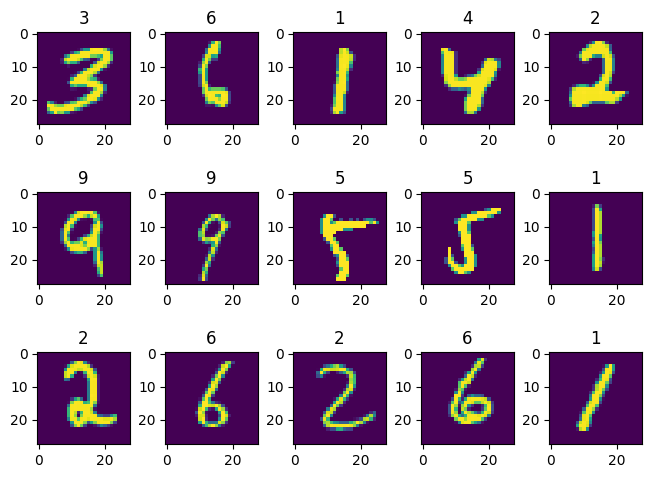

In [ ]:
import random

randomlist = random.sample(range(0, len(Train_set)), 15)
print(randomlist)
k=0
figure, ax = plt.subplots(3, 5,constrained_layout = True)

for i in range(3):
  for j in range(5):
    idx=randomlist[k]
    ax[i, j].imshow(Train_set[idx][0].permute(1,2,0))
    ax[i, j].set_title(f"{Train_set[idx][1]}")
    k+=1
    

### 2. Transforming Images (Augmentation)
`Train_set`               -> `train_transforms` <br>
`Dev_set`  and `Test_set` -> `Test_transforms` 

In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       #transforms.RandomResizedCrop(224),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.Grayscale(3), # convert from 1 channel to 3 channels
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))])


test_transforms = transforms.Compose([transforms.Resize(128),
                                      #transforms.CenterCrop(224),
                                      transforms.Resize((224,224)),
                                      transforms.Grayscale(3),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])

In [ ]:
Train_Aug   =datasets.MNIST('./MNIST',train = True, transform=train_transforms, download=False)
Test_set_Aug=datasets.MNIST('./MNIST',train = False,transform=test_transforms,  download=False)
Train_set_Aug, Dev_set_Aug = torch.utils.data.random_split(Train_Aug, [50000,10000])
print("Train set:",len(Train_set))
print("Test set:",len(Test_set))
print("Dev set:",len(Dev_set))

Train set: 50000
Test set: 10000
Dev set: 10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Image shape: torch.Size([3, 224, 224])


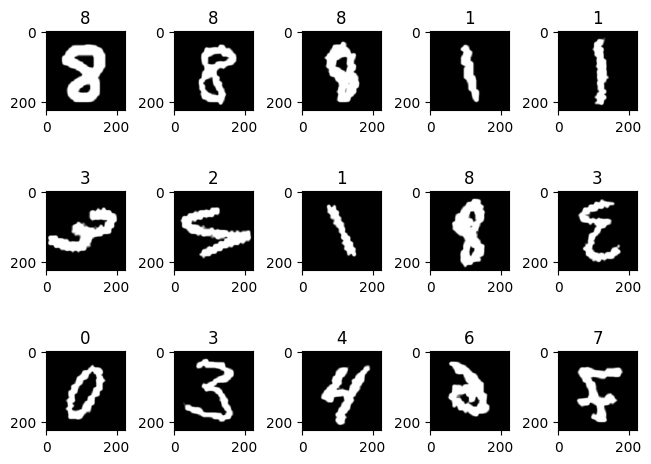

In [ ]:
randomlist = random.sample(range(0, len(Train_set_Aug)), 15)
#print(randomlist)
k=0
figure, ax = plt.subplots(3, 5,constrained_layout = True)

for i in range(3):
    for j in range(5):
        idx=randomlist[k]
        ax[i, j].imshow(Train_set_Aug[idx][0].permute(1,2,0))
        ax[i, j].set_title(f"{Train_set_Aug[idx][1]}")
        k+=1

print(f"Image shape: {Train_set_Aug[0][0].shape}")

## 3. DataLoaders

In [ ]:
Trainloader = torch.utils.data.DataLoader(Train_set_Aug, batch_size=128, shuffle=True)
Devloader = torch.utils.data.DataLoader(Dev_set_Aug, batch_size=128,shuffle=False)
Testloader=torch.utils.data.DataLoader(Test_set_Aug, batch_size=128,shuffle=False)

In [ ]:
print(f"Total no. of batches in trainloader : {len(Trainloader)}")
print(f"Total no. of batches in validloader : {len(Devloader)}")
print(f"Total no. of batches in testloader : {len(Testloader)}")

Total no. of batches in trainloader : 391
Total no. of batches in validloader : 79
Total no. of batches in testloader : 79


## 4. Model Parameters
Model Archictecture <br>
Loss Function <br>
optimizer<br>

### 4.1 Model Architecture (Transfer Learning)

#### 4.1.1 List of Models

In [ ]:
models_arch=['resnet50',"densenet121","convnext_tiny","efficientnet_v2_m","vit_b_16","swin_b"]
num_classes=10

#### 4.1.2 Changing Last Layer of Model (Classifier)

Getting info about the Model Architecture using `summary` from `torchinfo` <br>
(**P.s**) Knowing name of Last Layer (Classifier)

In [ ]:
models={}
model=torch.hub.load("pytorch/vision", models_arch[0], weights="IMAGENET1K_V1").to(device)
models["models_arch[0]"]=model
summary(models["models_arch[0]"], 
        (128,3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Using cache found in /home1/ece1/.cache/torch/hub/pytorch_vision_main


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [128, 3, 224, 224]   [128, 1000]          --                   True
├─Conv2d (conv1)                         [128, 3, 224, 224]   [128, 64, 112, 112]  9,408                True
├─BatchNorm2d (bn1)                      [128, 64, 112, 112]  [128, 64, 112, 112]  128                  True
├─ReLU (relu)                            [128, 64, 112, 112]  [128, 64, 112, 112]  --                   --
├─MaxPool2d (maxpool)                    [128, 64, 112, 112]  [128, 64, 56, 56]    --                   --
├─Sequential (layer1)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    └─Bottleneck (0)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    │    └─Conv2d (conv1)               [128, 64, 56, 56]    [128, 64, 56, 56]    4,096                True
│    │    └─BatchN

In [ ]:
in_features=model.fc.in_features #model.Lastlayer.in_features
in_features

2048

Changing Last Layer for first model (Resnet50) in `models` dictionary

In [ ]:

models["models_arch[0]"].fc = torch.nn.Sequential( 
    torch.nn.Linear(in_features=in_features,out_features=128),
    torch.nn.ReLU(inplace=True),
    torch.nn.Linear(in_features=128, 
                    out_features=num_classes, # same number of output units as our number of classes
                    bias=True)).to(device)

summary(models["models_arch[0]"], 
        (128,3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [128, 3, 224, 224]   [128, 10]            --                   True
├─Conv2d (conv1)                         [128, 3, 224, 224]   [128, 64, 112, 112]  9,408                True
├─BatchNorm2d (bn1)                      [128, 64, 112, 112]  [128, 64, 112, 112]  128                  True
├─ReLU (relu)                            [128, 64, 112, 112]  [128, 64, 112, 112]  --                   --
├─MaxPool2d (maxpool)                    [128, 64, 112, 112]  [128, 64, 56, 56]    --                   --
├─Sequential (layer1)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    └─Bottleneck (0)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    │    └─Conv2d (conv1)               [128, 64, 56, 56]    [128, 64, 56, 56]    4,096                True
│    │    └─BatchN

#### 4.1.3 Model Class
**Gathering all into a class**

In [ ]:
class Model(nn.Module):
    def __init__(self,model_arch,num_classes=10,device="cuda"):
        super().__init__()
        self.model_arch=model_arch
        #self.classifier_name=classifier_name
        self.device=device
        self.num_classes=num_classes
        self.model=torch.hub.load("pytorch/vision", self.model_arch, weights="IMAGENET1K_V1").to(self.device)
        
        # fc=model.last_layer_name
        self.in_features=(self.model).fc.in_features
        
        # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
        for param in self.model.parameters():
            param.requires_grad = False
            
        self.model.fc= torch.nn.Sequential( 
            torch.nn.Linear(in_features=self.in_features,out_features=128),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features=128,
                            out_features=self.num_classes, # same number of output units as our number of classes
                            bias=True)).to(self.device)
        
        
    def forward(self,x):
        y=self.model(x)
        return (y)


In [ ]:
model_Res=Model(models_arch[0])
summary(model_Res, 
        (128,3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Using cache found in /home1/ece1/.cache/torch/hub/pytorch_vision_main


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Model (Model)                                 [128, 3, 224, 224]   [128, 10]            --                   Partial
├─ResNet (model)                              [128, 3, 224, 224]   [128, 10]            --                   Partial
│    └─Conv2d (conv1)                         [128, 3, 224, 224]   [128, 64, 112, 112]  (9,408)              False
│    └─BatchNorm2d (bn1)                      [128, 64, 112, 112]  [128, 64, 112, 112]  (128)                False
│    └─ReLU (relu)                            [128, 64, 112, 112]  [128, 64, 112, 112]  --                   --
│    └─MaxPool2d (maxpool)                    [128, 64, 112, 112]  [128, 64, 56, 56]    --                   --
│    └─Sequential (layer1)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   False
│    │    └─Bottleneck (0)                    [128, 64, 56, 56]    [128, 256, 

### 4.2 Loss Function 

In [ ]:
loss_fn = nn.CrossEntropyLoss()

### 4.3 Optimizer

In [ ]:
def Get_optimizer(opt="SGD",lr=3e-3):
    if opt=="SGD":
        return  optim.SGD(model_Res.parameters(), lr=lr)
    elif opt=="Adam":
        return optim.Adam(model_Res.parameters(), lr=lr)
    else:
        return optim.RMSprop(model_Res.parameters(), lr=lr)
    
optimizer=Get_optimizer(opt="SGD",lr=3e-3)

#Reducing lr when validation loss gets saturated and wait for patience=3
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, factor=0.1, patience=3, cooldown=0, verbose=True)

## 4. Train  and Test (Dev) functions

In [ ]:
def train_fn(model,dataloader,loss_fn,optimizer,current_epo,epochs):
    
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    total_loss, total_acc = 0, 0
    tk=tqdm( dataloader,desc=("Epoch"+"[Train]"+str(current_epo+1)+"/"+str(epochs)) )

    #iterations in 1 epoch # iterations=len(trainloader)=901 batches each batch consist of32 images
    for t,data in enumerate(tk):
        images,labels=data
        images,labels=images.to(device) ,labels.to(device)


        # 1. Forward pass
        y_pred=model(images)


        # 2. Calculate  and accumulate loss
        loss=loss_fn(y_pred,labels)
        total_loss+=loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        total_acc += (y_pred_class == labels).sum().item()/len(y_pred)

        tk.set_postfix({"loss":"%3f" %float(total_loss/(t+1)),"acc":"%3f" %float(total_acc/(t+1))})

    return total_loss/len(dataloader), total_acc/len(dataloader)

In [ ]:
def eval_fn(model,dataloader,loss_fn,current_epo,epochs):

    model.eval()
    total_loss=0.0
    total_acc=0.0
    tk=tqdm(dataloader, desc=("Epoch"+"[Eval]"+str(current_epo+1)+"/"+str(epochs)) )


    for t,data in enumerate(tk):
        images,labels=data
        images,labels=images.to(device) ,labels.to(device)

        y_pred=model(images)

        loss=loss_fn(y_pred,labels)
        total_loss+=loss.item()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        total_acc += (y_pred_class == labels).sum().item()/len(y_pred)
        tk.set_postfix({"loss":"%3f" %float(total_loss/(t+1)),"acc":"%3f" %float(total_acc/(t+1))})

    return (total_loss/len(dataloader)),(total_acc/len(dataloader))

## 5. main

### 5.1 Train and dev set Losses and Accuracies

In [ ]:
def main(model,Trainloader,Devloader,loss_fn,optimizer,lr):
    best_valid_loss=np.Inf
    valid_losses=[]
    epochs=10
    print("Learning_Rate")
    for i in range(epochs):
        train_loss , train_acc=train_fn(model, Trainloader, loss_fn, optimizer , i,epochs)
        print (f"train_acc= {train_acc}")
        valid_loss , valid_acc=eval_fn (model, Devloader,   loss_fn,  i, epochs) 

        if valid_loss <best_valid_loss:
            torch.save(model.state_dict(),f"best_weights_lr{lr}.pt")
            print('best weights saved')
            best_valid_loss=valid_loss
            best_valid_acc=valid_acc

    valid_losses.append(valid_loss)
    print (f"best_valid_acc== {best_valid_acc}")

In [ ]:
if __name__ == "__main__":
    main(model_Res,Trainloader,Devloader,loss_fn,Get_optimizer(opt="SGD",lr=3e-3),lr=3e-3)

Learning_Rate


Epoch[Train]1/10: 100%|█| 391/391 [02:23<00:00,  2.73it/s, loss=2.096404, acc=0.


train_acc= 0.41034606777493604


Epoch[Eval]1/10: 100%|█| 79/79 [00:26<00:00,  2.96it/s, loss=1.927786, acc=0.482


best weights saved


Epoch[Train]2/10: 100%|█| 391/391 [02:18<00:00,  2.83it/s, loss=1.766036, acc=0.


train_acc= 0.5536325127877239


Epoch[Eval]2/10: 100%|█| 79/79 [00:26<00:00,  3.03it/s, loss=1.592968, acc=0.621


best weights saved


Epoch[Train]3/10: 100%|█| 391/391 [02:17<00:00,  2.84it/s, loss=1.473920, acc=0.


train_acc= 0.6328125


Epoch[Eval]3/10: 100%|█| 79/79 [00:25<00:00,  3.14it/s, loss=1.344469, acc=0.667


best weights saved


Epoch[Train]4/10: 100%|█| 391/391 [02:12<00:00,  2.94it/s, loss=1.256881, acc=0.


train_acc= 0.674500479539642


Epoch[Eval]4/10: 100%|█| 79/79 [00:25<00:00,  3.14it/s, loss=1.160188, acc=0.690


best weights saved


Epoch[Train]5/10: 100%|█| 391/391 [02:12<00:00,  2.94it/s, loss=1.104036, acc=0.


train_acc= 0.7010110294117646


Epoch[Eval]5/10: 100%|█| 79/79 [00:25<00:00,  3.14it/s, loss=1.026717, acc=0.714


best weights saved


Epoch[Train]6/10: 100%|█| 391/391 [02:13<00:00,  2.93it/s, loss=0.996857, acc=0.


train_acc= 0.7162523976982097


Epoch[Eval]6/10: 100%|█| 79/79 [00:25<00:00,  3.15it/s, loss=0.942940, acc=0.724


best weights saved


Epoch[Train]7/10: 100%|█| 391/391 [02:12<00:00,  2.95it/s, loss=0.921632, acc=0.


train_acc= 0.7290601023017903


Epoch[Eval]7/10: 100%|█| 79/79 [00:25<00:00,  3.16it/s, loss=0.872587, acc=0.737


best weights saved


Epoch[Train]8/10: 100%|█| 391/391 [02:12<00:00,  2.94it/s, loss=0.863199, acc=0.


train_acc= 0.739973625319693


Epoch[Eval]8/10: 100%|█| 79/79 [00:25<00:00,  3.14it/s, loss=0.821314, acc=0.749


best weights saved


Epoch[Train]9/10: 100%|█| 391/391 [02:13<00:00,  2.92it/s, loss=0.822755, acc=0.


train_acc= 0.7453924232736573


Epoch[Eval]9/10: 100%|█| 79/79 [00:25<00:00,  3.15it/s, loss=0.784891, acc=0.757


best weights saved


Epoch[Train]10/10: 100%|█| 391/391 [02:12<00:00,  2.95it/s, loss=0.790305, acc=0


train_acc= 0.7546914961636829


Epoch[Eval]10/10: 100%|█| 79/79 [00:25<00:00,  3.13it/s, loss=0.751250, acc=0.76


best weights saved
best_valid_acc== 0.7671083860759493


## 6. Testing Model 

In [ ]:
model_Res.load_state_dict(torch.load('./best_weights_lr0.003.pt'))
Test_loss , Test_acc=eval_fn (model_Res, Testloader,   loss_fn, 0,1) 

Epoch[Eval]1/1: 100%|█| 79/79 [00:25<00:00,  3.10it/s, loss=0.706594, acc=0.7784


### Visualizng output 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


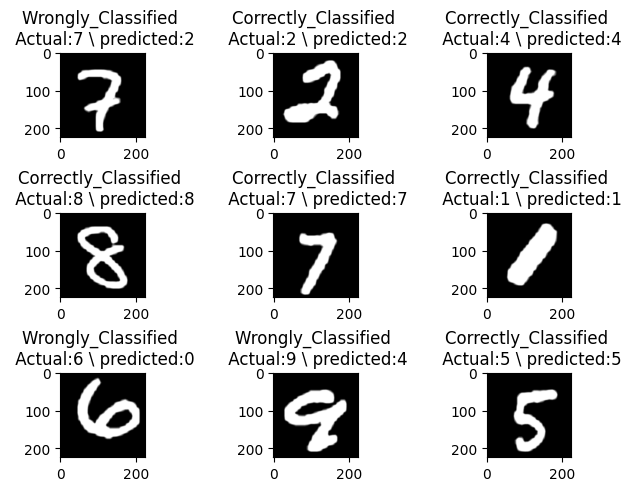

In [ ]:
import random

randomlist = random.sample(range(0, len(Test_set_Aug)), 9)
k=0
figure, ax = plt.subplots(3, 3,constrained_layout = True)

for i in range(3):
  for j in range(3):
    idx=randomlist[k]
    img=Test_set_Aug[idx][0]
    y_prob= model_Res((img.to(device)).unsqueeze(0))
    y_pred=torch.argmax(torch.softmax(y_prob, dim=1), dim=1)
    ax[i, j].imshow(img.permute(1,2,0))
    
    if Test_set_Aug[idx][1]==y_pred[0]:
        check="Correctly_Classified"
    else:
        check="Wrongly_Classified"
        
    ax[i, j].set_title(f"{check} \n Actual:{Test_set_Aug[idx][1]} \ predicted:{y_pred[0]}")
    k+=1
    